# Comcast Telecommunications - Consumer Complaints

**Project Description:**

**Introduction:**

Comcast Telecom, a leading telecommunications provider committed to enhancing customer experiences, embarked on a data-driven journey to decipher the voices of its valued customers. In an era where customer satisfaction stands as a paramount benchmark of success, understanding and addressing customer concerns is not just a priority but a strategic imperative.

**Aim:**

The primary aim of this project is to gain profound insights into customer feedback and complaints, thus empowering Comcast Telecom to elevate service quality, enhance customer satisfaction, and cement its reputation as a customer-centric telecommunications leader.

**What to Achieve:**

Through rigorous analysis of a vast dataset of customer complaints and feedback, we aim to achieve several key objectives:

1. **Identify Geographic Patterns:** Discern geographical clusters where Comcast Telecom faces the highest number of complaints. This understanding will drive the formulation of region-specific strategies.

2. **Temporal Insights:** Recognize temporal trends in complaints to allocate resources efficiently, ensuring a proactive response during peak periods.

3. **Enhance Customer Satisfaction:** Investigate satisfaction rates in conjunction with complaint data. The goal is to pinpoint areas where improvements can be made to elevate overall customer satisfaction.

4. **Topic Modelling:** Utilize Latent Dirichlet Allocation (LDA) and Non-Negative Matrix Factorization (NMF) to categorize complaints into topics, allowing for a deeper understanding of prevalent themes.

5. **Document Clustering:** Implement K-Means clustering to group similar complaints together, enabling more focused analysis and targeted interventions.

6. **Recommendation Formulation:** Based on the insights gained, develop actionable recommendations that encompass region-specific strategies, improved complaint resolution processes, resource allocation during peak hours, and quality control measures.

7. **Strengthen Customer Relationships:** Ultimately, this project seeks to strengthen customer relationships by addressing concerns and improving the overall customer experience for companies.


In [169]:
import numpy as np 
import pandas as pd 
import datetime

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/comcast-telecom-complaints/Comcast.csv


# 1. Data Exploration:

In [170]:
# Load the dataset
customer = pd.read_csv('../input/comcast-telecom-complaints/Comcast.csv')  
customer.head(5)

,Ticket #,Customer Complaint,Date,Date_month_year,Time,Received Via,City,State,Zip code,Status,Filing on Behalf of Someone
0,250635,Comcast Cable Internet Speeds,22-04-15,22-Apr-15,3:53:50 PM,Customer Care Call,Abingdon,Maryland,21009,Closed,No
1,223441,Payment disappear - service got disconnected,04-08-15,04-Aug-15,10:22:56 AM,Internet,Acworth,Georgia,30102,Closed,No
2,242732,Speed and Service,18-04-15,18-Apr-15,9:55:47 AM,Internet,Acworth,Georgia,30101,Closed,Yes
3,277946,Comcast Imposed a New Usage Cap of 300GB that ...,05-07-15,05-Jul-15,11:59:35 AM,Internet,Acworth,Georgia,30101,Open,Yes
4,307175,Comcast not working and no service to boot,26-05-15,26-May-15,1:25:26 PM,Internet,Acworth,Georgia,30101,Solved,No


In [171]:
#Data types of columns
print("Data Type: \n", customer.dtypes)

Data Type: 
 Ticket #                       object
Customer Complaint             object
Date                           object
Date_month_year                object
Time                           object
Received Via                   object
City                           object
State                          object
Zip code                        int64
Status                         object
Filing on Behalf of Someone    object
dtype: object


In [172]:
# Converting Zip code to string
customer['Zip code'] = customer['Zip code'].astype(str)

#Adding new column DateTime
Datetime=[0]*customer.shape[0]

for i in range(customer.shape[0]):
    date = customer.Date[i]
    time = customer.Time[i]
    Dtj = date + time  
    Datetime[i] = datetime.datetime.strptime(Dtj, '%d-%m-%y%I:%M:%S %p')

customer.insert(11, 'DateTime', Datetime)

In [173]:
#Data types of columns
print("Data Type: \n", customer.dtypes)

Data Type: 
 Ticket #                               object
Customer Complaint                     object
Date                                   object
Date_month_year                        object
Time                                   object
Received Via                           object
City                                   object
State                                  object
Zip code                               object
Status                                 object
Filing on Behalf of Someone            object
DateTime                       datetime64[ns]
dtype: object


In [174]:
# renaming ticket column
customer = customer.rename(columns = {"Ticket #": 'Ticket'})

In [175]:
#checking for missing values
print("Missing Values: \n", customer.isnull().sum())

Missing Values: 
 Ticket                         0
Customer Complaint             0
Date                           0
Date_month_year                0
Time                           0
Received Via                   0
City                           0
State                          0
Zip code                       0
Status                         0
Filing on Behalf of Someone    0
DateTime                       0
dtype: int64


In [176]:
# Basic statistical analysis for numeric variables
numeric_stats = customer.describe()
print("Numeric Variables Statistics:\n", numeric_stats)

Numeric Variables Statistics:
                             DateTime
count                           2224
mean   2015-06-10 14:30:38.742805760
min              2015-01-04 00:18:47
25%       2015-05-06 09:38:30.500000
50%              2015-06-20 13:40:14
75%    2015-06-25 23:02:37.249999872
max              2015-12-06 23:52:11


In [177]:
# Getting unique values in non-numeric columns
print("Received Via unique values:\n", customer['Received Via'].unique())
print("Status unique values:\n", customer['Status'].unique())
print("Filing on Behalf of Someone unique values:\n", customer['Filing on Behalf of Someone'].unique())

Received Via unique values:
 ['Customer Care Call' 'Internet']
Status unique values:
 ['Closed' 'Open' 'Solved' 'Pending']
Filing on Behalf of Someone unique values:
 ['No' 'Yes']


In [178]:
customer.head()

,Ticket,Customer Complaint,Date,Date_month_year,Time,Received Via,City,State,Zip code,Status,Filing on Behalf of Someone,DateTime
0,250635,Comcast Cable Internet Speeds,22-04-15,22-Apr-15,3:53:50 PM,Customer Care Call,Abingdon,Maryland,21009,Closed,No,2015-04-22 15:53:50
1,223441,Payment disappear - service got disconnected,04-08-15,04-Aug-15,10:22:56 AM,Internet,Acworth,Georgia,30102,Closed,No,2015-08-04 10:22:56
2,242732,Speed and Service,18-04-15,18-Apr-15,9:55:47 AM,Internet,Acworth,Georgia,30101,Closed,Yes,2015-04-18 09:55:47
3,277946,Comcast Imposed a New Usage Cap of 300GB that ...,05-07-15,05-Jul-15,11:59:35 AM,Internet,Acworth,Georgia,30101,Open,Yes,2015-07-05 11:59:35
4,307175,Comcast not working and no service to boot,26-05-15,26-May-15,1:25:26 PM,Internet,Acworth,Georgia,30101,Solved,No,2015-05-26 13:25:26


# 2. Plots - Exploring further

In [179]:
# Setting fonts throughout all plots
import matplotlib.pyplot as plt
import seaborn as sns

def set_font_sizes():
    # Setting font sizes for various elements in the charts
    plt.rc('font', size=12)           # Controls default text sizes
    plt.rc('axes', titlesize=14)      # Fontsize of the axes title
    plt.rc('axes', labelsize=12)      # Fontsize of the x and y labels
    plt.rc('xtick', labelsize=10)     # Fontsize of the tick labels
    plt.rc('ytick', labelsize=10)     # Fontsize of the tick labels
    plt.rc('legend', fontsize=10)     # Legend fontsize
    plt.rc('figure', titlesize=16)    # Fontsize of the figure title

**2.1 Number of Complaints Recieved from States**

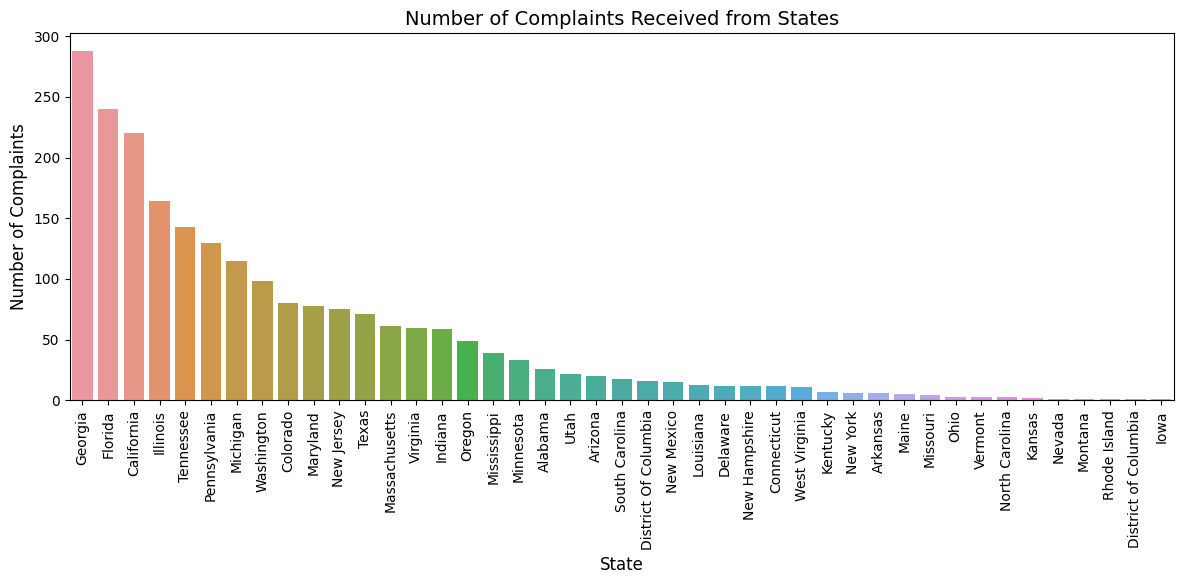

In [180]:
def plot_complaints_by_state(data):
    set_font_sizes()
    
    # Group data by state and count complaints
    state_complaints = data['State'].value_counts().reset_index()
    state_complaints.columns = ['State', 'Number of Complaints']

    # Creating a bar plot for complaints by state
    plt.figure(figsize=(12, 6))
    sns.barplot(x='State', y='Number of Complaints', data=state_complaints)
    plt.title('Number of Complaints Received from States')
    plt.xticks(rotation=90)
    plt.xlabel('State')
    plt.ylabel('Number of Complaints')
    plt.tight_layout()
    plt.show()

# Call the function to plot complaints by state
plot_complaints_by_state(customer)

As seen in the chart above, Comcast Telecom has received the highest number of complaints from the state of Georgia, followed by Florida, California, Illinois, Tennessee, Pennsylvania, Michigan, Washington, and Colorado. 

**2.2 Month-wise Complaints Received**

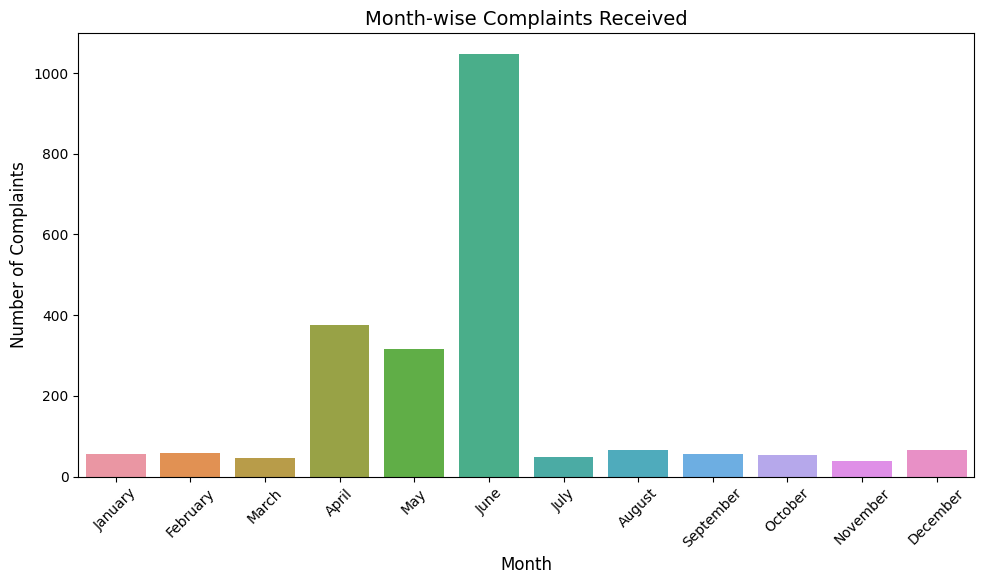

In [181]:
def plot_monthly_complaints(data):
    set_font_sizes()
    
    # Extract month from the DateTime column
    data['Month'] = data['DateTime'].dt.month_name()

    # Group data by month and count complaints
    monthly_complaints = data['Month'].value_counts().reset_index()
    monthly_complaints.columns = ['Month', 'Number of Complaints']

    # Creating a bar plot for month-wise complaints
    plt.figure(figsize=(10, 6))
    sns.barplot(x='Month', y='Number of Complaints', data=monthly_complaints,
                order=['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December'])
    plt.title('Month-wise Complaints Received')
    plt.xticks(rotation=45)
    plt.xlabel('Month')
    plt.ylabel('Number of Complaints')
    plt.tight_layout()
    plt.show()

# Call the function to plot month-wise complaints
plot_monthly_complaints(customer)

June emerges as the month with the highest number of complaints received throughout the year, as indicated in the chart above. During this period, Comcast Telecom received a notable volume of complaints, making June the peak month for customer concerns.

**2.3 Status of Complaints Received by State**

<Figure size 1200x600 with 0 Axes>

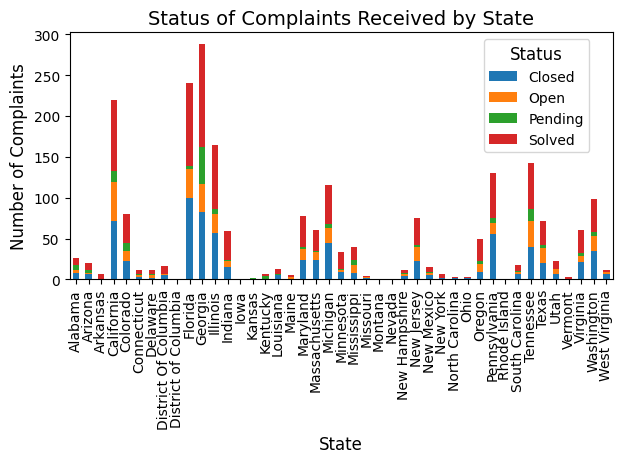

In [182]:
def plot_status_by_state(data):
    set_font_sizes()
    
    # Create a pivot table to count the number of complaints by state and status
    state_status_counts = data.pivot_table(index='State', columns='Status', values='Ticket', aggfunc='count')
    
    # Creating a stacked bar chart
    plt.figure(figsize=(12, 6))
    state_status_counts.plot(kind='bar', stacked=True)
    plt.title('Status of Complaints Received by State')
    plt.xlabel('State')
    plt.ylabel('Number of Complaints')
    plt.legend(title='Status', bbox_to_anchor=(0.75, 1), loc='upper left')
    plt.xticks(rotation=90)
    plt.tight_layout()
    plt.show()

# Call the function to plot status of complaints by state
plot_status_by_state(customer)

As observed in the chart, the majority of the complaints have been resolved, indicated by the red segments. However, there are still some open and pending complaints, as seen in the green and orange segments respectively. Despite the overall resolution of most issues, a portion of complaints remains open and pending resolution.

**2.4 Complaints Received by State and Received Via**

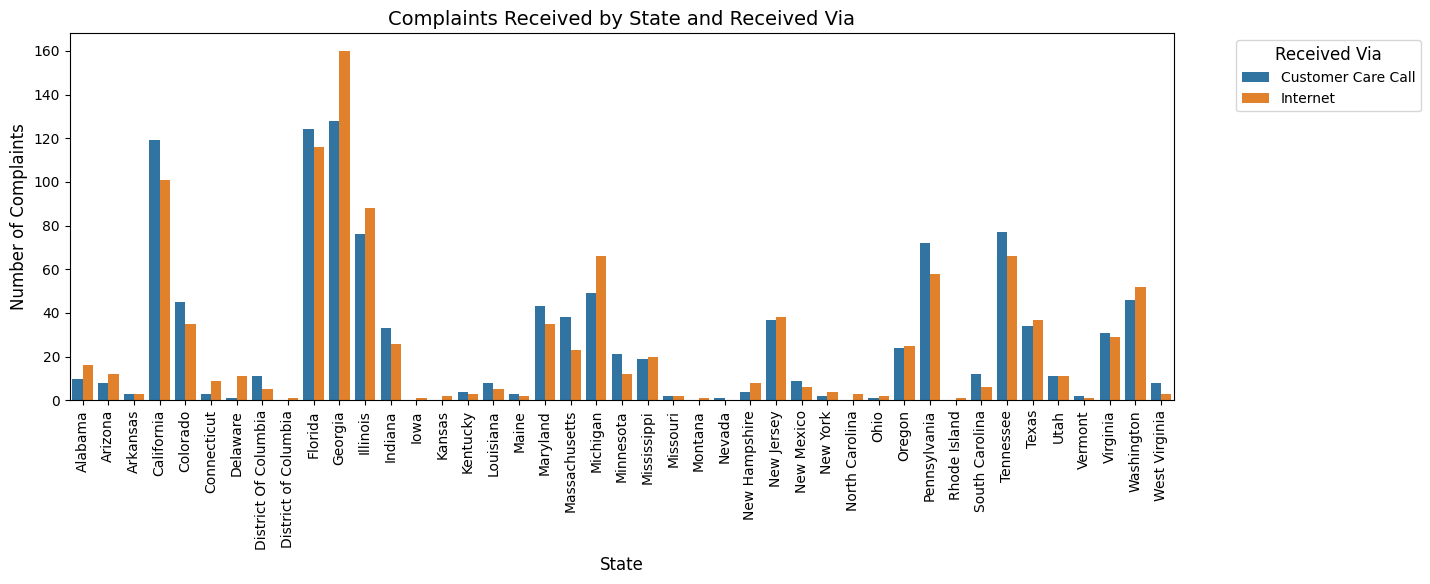

In [183]:
def plot_received_via_by_state(data):
    set_font_sizes()
    
    # Group data by state and received via, and count complaints
    state_received_via_counts = data.groupby(['State', 'Received Via'])['Ticket'].count().reset_index()
    
    # Creating a grouped bar chart
    plt.figure(figsize=(12, 6))
    sns.barplot(x='State', y='Ticket', hue='Received Via', data=state_received_via_counts)
    plt.title('Complaints Received by State and Received Via')
    plt.xlabel('State')
    plt.ylabel('Number of Complaints')
    plt.xticks(rotation=90)
    plt.tight_layout()
    plt.legend(title='Received Via', bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.show()

# Call the function to plot complaints received by state and received via
plot_received_via_by_state(customer)

In this chart,  "Customer Care Call" channel has seen the highest usage in states such as California, Florida, Tennessee, and Pennsylvania. These states have a notable number of complaints received through customer care calls.

Conversely, complaints received via the "Internet" channel appear to be more prominent in states like Georgia, Illinois, Michigan, and Washington. These states exhibit a higher frequency of complaints received through online channels.

This distribution highlights regional variations in how customers choose to raise their concerns, with some states preferring traditional customer care calls, while others opt for online communication channels.

**2.5 Complaints by Time of the Day**

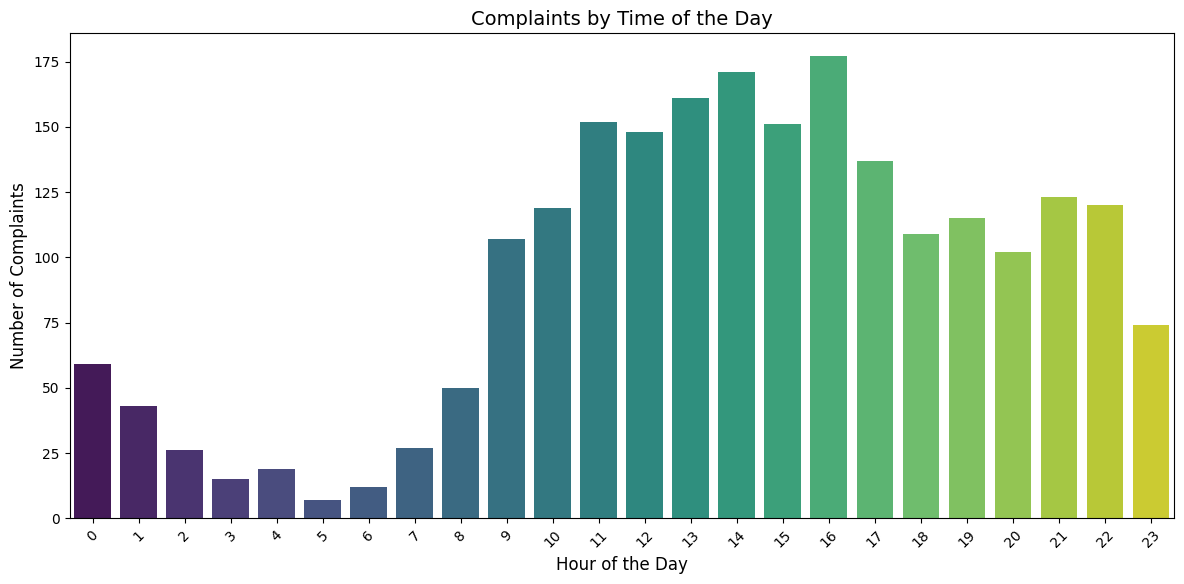

In [184]:
import matplotlib.pyplot as plt
import seaborn as sns

def plot_complaints_by_time(data):
    set_font_sizes()

    # Extracting the hour from the DateTime column
    data['Hour'] = data['DateTime'].dt.hour

    # Creating a bar chart for complaints by time of day
    plt.figure(figsize=(12, 6))
    sns.countplot(x='Hour', data=data, palette='viridis')
    plt.title('Complaints by Time of the Day')
    plt.xlabel('Hour of the Day')
    plt.ylabel('Number of Complaints')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

# Call the function to plot complaints by time of day
plot_complaints_by_time(customer)

As evident from the chart, the majority of complaints were filed during the hours between 11:00 AM and 5:00 PM. This time period represents the peak hours of the day for customer complaints. Comcast Telecom may need to focus on improving its services and customer support during these peak times to address the higher volume of customer concerns effectively.

**2.6 Complaints by Received Via and Status**

<Figure size 1200x600 with 0 Axes>

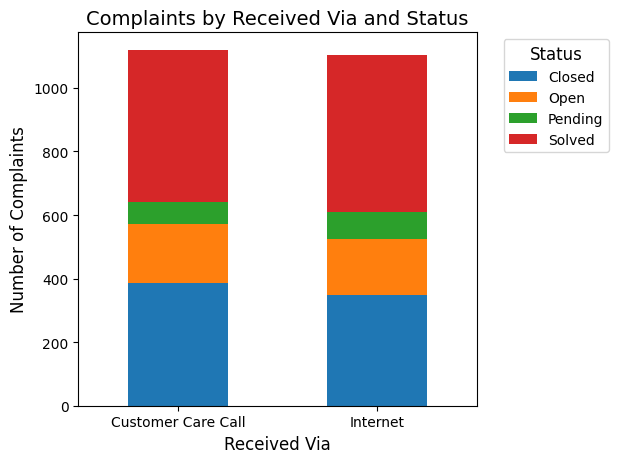

In [185]:
def plot_complaints_by_received_via_and_status(data):
    set_font_sizes()

    # Creating a pivot table to count complaints by Received Via and Status
    received_via_status_counts = data.pivot_table(index='Received Via', columns='Status', values='Ticket', aggfunc='count')

    # Creating a stacked bar chart
    plt.figure(figsize=(12, 6))
    received_via_status_counts.plot(kind='bar', stacked=True)
    plt.title('Complaints by Received Via and Status')
    plt.xlabel('Received Via')
    plt.ylabel('Number of Complaints')
    plt.xticks(rotation=0)
    plt.legend(title='Status', bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.tight_layout()
    plt.show()

# Call the function to plot complaints by Received Via and Status
plot_complaints_by_received_via_and_status(customer)

The chart highlights that complaints have been fairly evenly distributed between two major channels: "Customer Care Call" and "Internet." Additionally, it reveals that a similar number of complaints have remained in an "Open" status and an "Solved" status. This suggests that Comcast Telecom needs to focus on addressing both channels and ensure the resolution of open complaints to improve overall customer satisfaction.

The balanced distribution between channels and the presence of open complaints underscore the importance of addressing customer concerns effectively, regardless of the channel through which they are received.

**Summary of what found so far:**

**Chart 1**: Number of Complaints Received from States

Georgia, Florida, California, Illinois, Tennessee, Pennsylvania, Michigan, Washington, and Colorado are the states where Comcast Telecom has received the highest number of complaints.

**Chart 2**: Month-wise Complaints Received

June stands out as the month with the highest volume of complaints received throughout the year.

**Chart 3**: Status of Complaints Received by State

Most complaints have been resolved, but there are still open and pending complaints in some states.

**Chart 4**: Complaints Received by State and Received Via

"Customer Care Call" is the most common channel for complaints in states like California, Florida, Tennessee, and Pennsylvania, while "Internet" is more prominent in states like Georgia, Illinois, Michigan, and Washington.

**Chart 5**: Complaints by Time of the Day

Peak complaint hours occur between 11:00 AM and 6:00 PM, indicating that this is a critical time for Comcast Telecom to address customer concerns.

**Chart 6**: Complaints by Received Via and Status

Complaints are evenly distributed between "Customer Care Call" and "Internet," and an equal number of complaints are in "Open" and "Solved" statuses, suggesting a need to address both channels and resolve open complaints effectively.

# 3. Customer Satisfaction Level

**3.1 Overall Customer Satisfaction Rate -**

Calculating the overall customer satisfaction rate by examining the resolution status of complaints and identifying the proportion of complaints that have been "Solved" or "Closed" as an indication of satisfied customers.

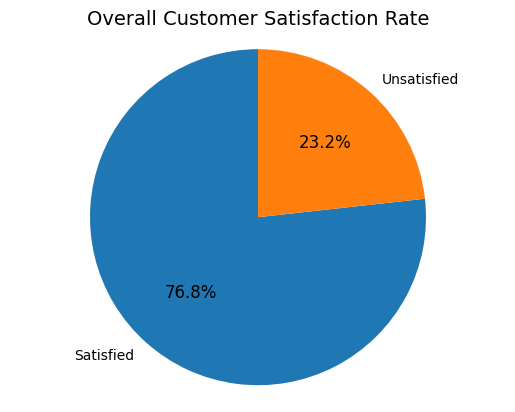

Overall Customer Satisfaction Rate: 76.75%


In [186]:
import matplotlib.pyplot as plt

# Calculating the total number of resolved complaints
resolved_complaints = len(customer[customer['Status'].isin(['Solved', 'Closed'])])

# Calculating the total number of complaints
total_complaints = len(customer)

# Calculating the overall customer satisfaction rate
satisfaction_rate = (resolved_complaints / total_complaints) * 100

# Creating a pie chart to visualize overall customer satisfaction
labels = ['Satisfied', 'Unsatisfied']
sizes = [satisfaction_rate, 100 - satisfaction_rate]
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90)
plt.title('Overall Customer Satisfaction Rate')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

print(f'Overall Customer Satisfaction Rate: {satisfaction_rate:.2f}%')


Overall Customer Satisfaction Rate: 76.75% 

**3.2 State-wise Customer Satisfaction Rate -**

Calculating the customer satisfaction rate for each state by examining the resolution status of complaints for each state.

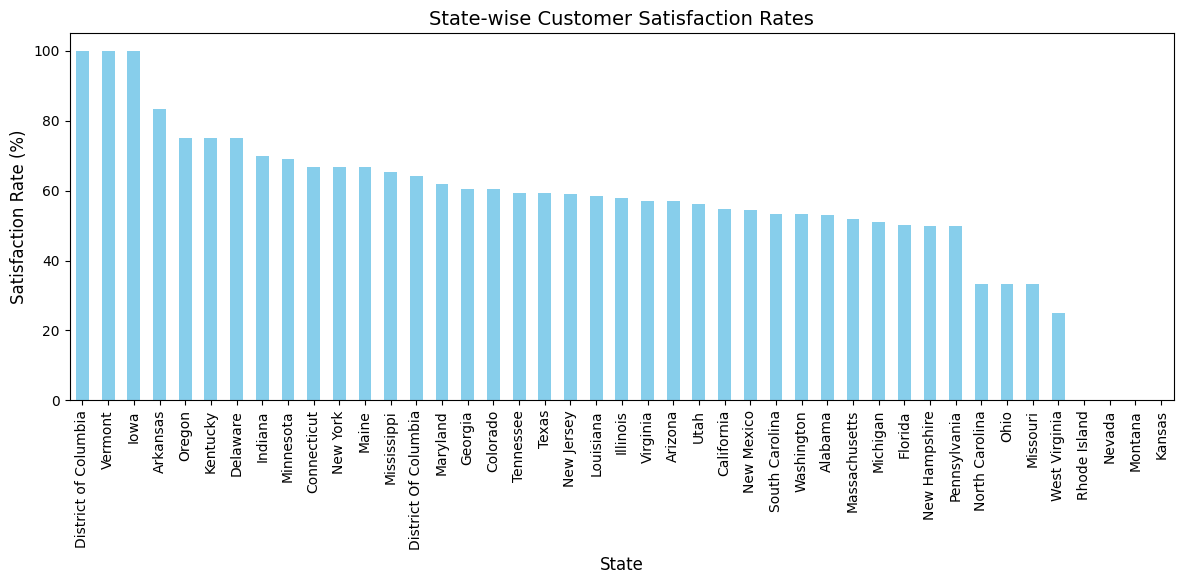

Status                Satisfaction Rate
State                                  
District of Columbia         100.000000
Vermont                      100.000000
Iowa                         100.000000
Arkansas                      83.333333
Oregon                        75.000000
Kentucky                      75.000000
Delaware                      75.000000
Indiana                       70.000000
Minnesota                     68.965517
Connecticut                   66.666667
New York                      66.666667
Maine                         66.666667
Mississippi                   65.217391
District Of Columbia          64.285714
Maryland                      61.904762
Georgia                       60.576923
Colorado                      60.344828
Tennessee                     59.375000
Texas                         59.183673
New Jersey                    58.928571
Louisiana                     58.333333
Illinois                      57.777778
Virginia                      57.142857


In [187]:
import pandas as pd
import matplotlib.pyplot as plt

# Creating a pivot table to count resolved complaints by state and status
state_satisfaction_counts = customer[customer['Status'].isin(['Solved', 'Closed'])].pivot_table(
    index='State', columns='Status', values='Ticket', aggfunc='count', fill_value=0)

# Calculating the satisfaction rate for each state as a percentage of resolved complaints
state_satisfaction_counts['Satisfaction Rate'] = (state_satisfaction_counts['Solved'] / 
                                                   (state_satisfaction_counts['Solved'] + state_satisfaction_counts['Closed'])) * 100

# Sorting states by satisfaction rate
state_satisfaction_counts = state_satisfaction_counts.sort_values(by='Satisfaction Rate', ascending=False)

# bar chart to visualize state-wise customer satisfaction rates
plt.figure(figsize=(12, 6))
state_satisfaction_counts['Satisfaction Rate'].plot(kind='bar', color='skyblue')
plt.title('State-wise Customer Satisfaction Rates')
plt.xlabel('State')
plt.ylabel('Satisfaction Rate (%)')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

# state-wise satisfaction rates
print(state_satisfaction_counts[['Satisfaction Rate']])

The data reveals interesting insights into customer satisfaction rates across states. States with fewer complaints, such as District of Columbia, Vermont, and Iowa, tend to exhibit exceptionally high satisfaction rates, all reaching 100%. This suggests that in these regions, Comcast Telecom has effectively addressed and resolved the relatively lower volume of customer complaints, resulting in highly satisfied customers.

In contrast, states with the highest number of complaints, including Georgia, Florida, California, Illinois, Tennessee, Pennsylvania, Michigan, Washington, and Colorado, present a diverse range of satisfaction rates, with the lowest being around 50%. This disparity highlights the need for Comcast Telecom to focus on improving customer satisfaction in these high-complaint states. It's evident that addressing the concerns of a larger customer base in these regions is crucial to enhancing overall satisfaction levels

# 4. PreProcessing, Complaint Analysis - NLP

The function performs the specified preprocessing steps on the text data. 

In [188]:
pip install pyspellchecker

Note: you may need to restart the kernel to use updated packages.


In [189]:
import nltk
nltk.download('all')

[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to /usr/share/nltk_data...
[nltk_data]    |   Package abc is already up-to-date!
[nltk_data]    | Downloading package alpino to /usr/share/nltk_data...
[nltk_data]    |   Package alpino is already up-to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger to
[nltk_data]    |     /usr/share/nltk_data...
[nltk_data]    |   Package averaged_perceptron_tagger is already up-
[nltk_data]    |       to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger_ru to
[nltk_data]    |     /usr/share/nltk_data...
[nltk_data]    |   Package averaged_perceptron_tagger_ru is already
[nltk_data]    |       up-to-date!
[nltk_data]    | Downloading package basque_grammars to
[nltk_data]    |     /usr/share/nltk_data...
[nltk_data]    |   Package basque_grammars is already up-to-date!
[nltk_data]    | Downloading package bcp47 to /usr/share/nltk_data...
[nltk_data]    |   Pack

True

In [190]:
#unzip the wordnet.zip file manually
!unzip /usr/share/nltk_data/corpora/wordnet.zip -d /usr/share/nltk_data/corpora/

Archive:  /usr/share/nltk_data/corpora/wordnet.zip
replace /usr/share/nltk_data/corpora/wordnet/lexnames? [y]es, [n]o, [A]ll, [N]one, [r]ename: ^C


In [191]:
import pandas as pd
import nltk
from nltk.corpus import stopwords
from nltk.corpus import wordnet
from nltk.stem import WordNetLemmatizer
import string

# Download NLTK resources (if not already downloaded)
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

# Ensure the 'Customer Complaint' column is of string type
customer['Customer Complaint'] = customer['Customer Complaint'].astype(str)

# Convert the "Customer Complaint" column to lowercase
customer['Customer Complaint'] = customer['Customer Complaint'].str.lower()

# Tokenization: Split text into words or tokens
print("Tokenization")
customer['Customer Complaint'] = customer['Customer Complaint'].apply(nltk.word_tokenize)
print(customer['Customer Complaint'])

# Removing Punctuation: Remove punctuation marks, special characters, and numbers
print("Punctuation Removal")
customer['Customer Complaint'] = customer['Customer Complaint'].apply(lambda words: [word for word in words if word.isalpha()])
print(customer['Customer Complaint'])

# Stopword Removal: Eliminate common stopwords
stop_words = set(stopwords.words('english'))
print("Stopword Removal")
customer['Customer Complaint'] = customer['Customer Complaint'].apply(lambda words: [word for word in words if word not in stop_words])
print(customer['Customer Complaint'])

# Lemmatization: Reduce words to their base forms
lemmatizer = WordNetLemmatizer()
print("Lemmatization")
try:
    customer['Customer Complaint'] = customer['Customer Complaint'].apply(lambda words: [lemmatizer.lemmatize(word) for word in words])
except Exception as e:
    print(f"Error during lemmatization: {e}")
print(customer['Customer Complaint'])

# Join the processed words back into a single string
print("Joining")
customer['Customer Complaint'] = customer['Customer Complaint'].apply(' '.join)
print(customer['Customer Complaint'])

[nltk_data] Downloading package punkt to /usr/share/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /usr/share/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /usr/share/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
Tokenization
0                      [comcast, cable, internet, speeds]
1       [payment, disappear, -, service, got, disconne...
2                                   [speed, and, service]
3       [comcast, imposed, a, new, usage, cap, of, 300...
4       [comcast, not, working, and, no, service, to, ...
                              ...                        
2219                              [service, availability]
2220    [comcast, monthly, billing, for, returned, modem]
2221                          [complaint, about, comcast]
2222          [extremely, unsatisfied, comcast, customer]
2223         [comcast, ,, ypsilanti, mi, intern

# 5. Topic Modeling Technique

In this section, Count Vectorization is used to create a document-term matrix where each row represents a document (complaint) and each column represents a term (word).

NMF(Non-Negative Matrix Factorization (NMF) for topic modeling) is applied to the document-term matrix to perform topic modeling. 

LDA is another popular technique for topic modeling, and is explored as well.

The get_top_words_for_topics function extracts the top words associated with each topic.

Top words for each topic is printed.


**5.1 NMF(Non-Negative Matrix Factorization (NMF)**

In [192]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import NMF

# Initialize the Count Vectorizer
count_vectorizer = CountVectorizer()

# Fit and transform the 'Customer Complaint' column
count_matrix = count_vectorizer.fit_transform(customer['Customer Complaint'])

# Creating a DataFrame to store the document-term matrix
count_df = pd.DataFrame(count_matrix.toarray(), columns=count_vectorizer.get_feature_names_out())

# Initializing the NMF model for topic modeling
num_topics = 10 #number of topics as needed
nmf_model = NMF(n_components=num_topics, random_state=42)

# Fit the NMF model to the document-term matrix
nmf_model.fit(count_matrix)

# Getting the topics and their top words
def get_top_words_for_topics(model, feature_names, n_top_words=10):
    topic_top_words = {}
    for topic_idx, topic in enumerate(model.components_):
        top_words_idx = topic.argsort()[:-n_top_words - 1:-1]
        top_words = [feature_names[i] for i in top_words_idx]
        topic_top_words[f"Topic {topic_idx + 1}"] = top_words
    return topic_top_words

feature_names = count_vectorizer.get_feature_names_out()
topics_top_words = get_top_words_for_topics(nmf_model, feature_names)

# Printing the top words for each topic
for topic, top_words in topics_top_words.items():
    print(f"{topic}: {', '.join(top_words)}")


Topic 1: comcast, complaint, xfinity, throttling, bill, price, contract, charging, hbo, blocking
Topic 2: service, poor, failure, complaint, cancel, lack, horrible, business, call, never
Topic 3: internet, slow, cable, connection, phone, tv, price, outage, throttling, problem
Topic 4: data, cap, usage, limit, overage, atlanta, monthly, using, ga, meter
Topic 5: billing, fraudulent, complaint, dispute, incorrect, fraud, error, practice, improper, double
Topic 6: speed, slow, throttling, high, advertised, paying, low, promised, throttled, connection
Topic 7: issue, connection, several, connectivity, long, account, repeated, bill, loss, supervisor
Topic 8: charge, bill, overage, unauthorized, modem, fraudulent, fee, xfinity, rental, cable
Topic 9: practice, unfair, pricing, deceptive, business, xfinity, monopolistic, trade, sale, bad
Topic 10: customer, poor, fee, horrible, price, time, lie, service, rate, lied


**5.2  Latent Dirichlet Allocation (LDA)**

In [193]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation

# Initialize the Count Vectorizer
count_vectorizer = CountVectorizer()

# Fit and transform the 'Customer Complaint' column
count_matrix = count_vectorizer.fit_transform(customer['Customer Complaint'])

# Creating a DataFrame to store the document-term matrix
count_df = pd.DataFrame(count_matrix.toarray(), columns=count_vectorizer.get_feature_names_out())

# Initialize the LDA model for topic modeling
num_topics = 10  
lda_model = LatentDirichletAllocation(n_components=num_topics, random_state=42)

# Fit the LDA model to the document-term matrix
lda_model.fit(count_matrix)

# Getting the topics and their top words
def get_top_words_for_topics(model, feature_names, n_top_words=10):
    topic_top_words = {}
    for topic_idx, topic in enumerate(model.components_):
        top_words_idx = topic.argsort()[:-n_top_words - 1:-1]
        top_words = [feature_names[i] for i in top_words_idx]
        topic_top_words[f"Topic {topic_idx + 1}"] = top_words
    return topic_top_words

feature_names = count_vectorizer.get_feature_names_out()
topics_top_words = get_top_words_for_topics(lda_model, feature_names)

# Printing the top words for each topic
for topic, top_words in topics_top_words.items():
    print(f"{topic}: {', '.join(top_words)}")


Topic 1: price, comcast, service, modem, year, charged, refund, increase, rental, refuse
Topic 2: bill, comcast, charge, deceptive, false, problem, unauthorized, advertising, sale, month
Topic 3: fee, switch, bait, get, service, broadband, misleading, monthly, increased, charged
Topic 4: service, comcast, customer, poor, horrible, terrible, quality, lied, bad, bundle
Topic 5: comcast, data, cap, charge, usage, overage, limit, fee, charging, plan
Topic 6: internet, comcast, speed, slow, cable, connection, high, phone, tv, paying
Topic 7: billing, comcast, practice, unfair, pricing, speed, advertised, fraudulent, monopoly, incorrect
Topic 8: comcast, complaint, xfinity, hbo, go, account, blocking, availability, playstation, access
Topic 9: comcast, service, failure, contract, provide, never, email, payment, home, billed
Topic 10: issue, comcast, billing, throttling, speed, fraud, xfinity, wifi, false, account


**5.3 Assigning Topics to Documents**

Assigning topics to each document based on the highest topic probability.

In [194]:
# Import necessary libraries
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import numpy as np

# Assigning Topics to Documents
document_topics = lda_model.transform(count_matrix)
customer['Assigned Topics'] = [np.argmax(topic_probs) + 1 for topic_probs in document_topics]
print(customer[['Customer Complaint', 'Assigned Topics']])

                                    Customer Complaint  Assigned Topics
0                         comcast cable internet speed                6
1           payment disappear service got disconnected                4
2                                        speed service                6
3     comcast imposed new usage cap punishes streaming                9
4                         comcast working service boot               10
...                                                ...              ...
2219                              service availability                8
2220            comcast monthly billing returned modem                7
2221                                 complaint comcast                8
2222            extremely unsatisfied comcast customer                4
2223               comcast ypsilanti mi internet speed                6

[2224 rows x 2 columns]


**5.4 Topic Summarisation**

In [195]:
#Topic Summarisation
def get_topic_summaries(model, feature_names, n_top_words=10):
    topic_summaries = {}
    for topic_idx, topic in enumerate(model.components_):
        top_words_idx = topic.argsort()[:-n_top_words - 1:-1]
        top_words = [feature_names[i] for i in top_words_idx]
        topic_summaries[f"Topic {topic_idx + 1}"] = {
            "Top Words": top_words,
            "Description": ', '.join(top_words)
        }
    return topic_summaries

topic_summaries = get_topic_summaries(lda_model, feature_names)
for topic, summary in topic_summaries.items():
    print(f"{topic} Summary: {summary['Description']}")

Topic 1 Summary: price, comcast, service, modem, year, charged, refund, increase, rental, refuse
Topic 2 Summary: bill, comcast, charge, deceptive, false, problem, unauthorized, advertising, sale, month
Topic 3 Summary: fee, switch, bait, get, service, broadband, misleading, monthly, increased, charged
Topic 4 Summary: service, comcast, customer, poor, horrible, terrible, quality, lied, bad, bundle
Topic 5 Summary: comcast, data, cap, charge, usage, overage, limit, fee, charging, plan
Topic 6 Summary: internet, comcast, speed, slow, cable, connection, high, phone, tv, paying
Topic 7 Summary: billing, comcast, practice, unfair, pricing, speed, advertised, fraudulent, monopoly, incorrect
Topic 8 Summary: comcast, complaint, xfinity, hbo, go, account, blocking, availability, playstation, access
Topic 9 Summary: comcast, service, failure, contract, provide, never, email, payment, home, billed
Topic 10 Summary: issue, comcast, billing, throttling, speed, fraud, xfinity, wifi, false, account

**5.5 Document Clustering (K-Means)**

In [196]:
# Document clustering using K-Means on topic distributions
num_clusters = 5
kmeans = KMeans(n_clusters=num_clusters, random_state=42)
document_clusters = kmeans.fit_predict(document_topics)
customer['Document Cluster'] = document_clusters
print(customer[['Customer Complaint', 'Document Cluster']])

/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


                                    Customer Complaint  Document Cluster
0                         comcast cable internet speed                 0
1           payment disappear service got disconnected                 2
2                                        speed service                 0
3     comcast imposed new usage cap punishes streaming                 4
4                         comcast working service boot                 1
...                                                ...               ...
2219                              service availability                 2
2220            comcast monthly billing returned modem                 3
2221                                 complaint comcast                 2
2222            extremely unsatisfied comcast customer                 2
2223               comcast ypsilanti mi internet speed                 0

[2224 rows x 2 columns]


**5.6 Visualising Topics**

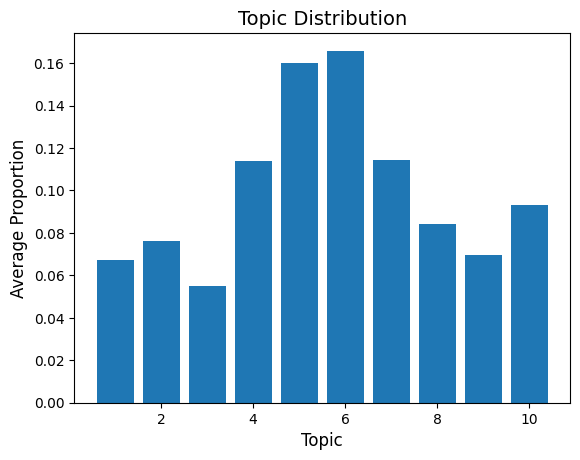

In [197]:
# Topic Visualisation (Bar Chart)
topic_distribution = document_topics.mean(axis=0)
plt.bar(range(1, num_topics + 1), topic_distribution)
plt.xlabel('Topic')
plt.ylabel('Average Proportion')
plt.title('Topic Distribution')
plt.show()

Above, topic modelling using LDA (Latent Dirichlet Allocation) and NMF (Non-Negative Matrix Factorization) was performed. To further analyse these topics, LDA model was used. 

1. **Assigned Topics to Documents**: Assigning topics to documents helped in categorising and understanding the content of each document. This was done to gain insights into what subjects or themes are prevalent in the dataset.

2. **Topic Summarisation**: Each topic was summarised based on the most representative words within that topic. For example:
  
1. **Topic 1 Summary**: This topic revolves around words like "price," "Comcast," "service," "modem," suggesting discussions related to pricing, service charges, and equipment like modems.

2. **Topic 2 Summary**: Documents in this topic are characterised by words like "bill," "charge," "deceptive," and "false." It indicates discussions regarding billing issues, potentially including deceptive or false charges.

3. **Topic 3 Summary**: This topic is associated with words like "fee," "switch," "bait," and "misleading." It may include content about fees, switching services, and concerns about deceptive practices.

4. **Topic 4 Summary**: Documents in this topic are related to "service," "Comcast," "customer," and words like "poor," "horrible," and "terrible." This suggests discussions about poor customer service experiences.

5. **Topic 5 Summary**: This topic features keywords like "Comcast," "data," "cap," "charge," and "usage." It implies discussions about Comcast's data usage policies and associated charges.

6. **Topic 6 Summary**: Documents in this topic contain words like "internet," "Comcast," "speed," "slow," and "cable." It points to concerns about internet speed and cable connections.

7. **Topic 7 Summary**: This topic relates to "billing," "Comcast," "practice," and words like "unfair," "pricing," and "fraudulent." It likely involves discussions about unfair billing practices and pricing concerns.

8. **Topic 8 Summary**: In this topic, keywords include "Comcast," "complaint," "Xfinity," "HBO," "go," and "account." It suggests discussions about customer complaints, access to services like HBO, and account-related issues.

9. **Topic 9 Summary**: This topic involves words like "Comcast," "service," "failure," "contract," and "never." It may encompass complaints about service failures, contract-related issues, and billing problems.

10. **Topic 10 Summary**: Documents in this topic feature words like "issue," "Comcast," "billing," "throttling," and "speed." It indicates discussions about various issues, including billing, internet speed throttling, and related problems.

By summarising topics, a snapshot of what each topic is primarily about was generated.

3. **Document Clustering using K-Means**: Document clustering was employed to group similar documents together based on their topic distributions. This aids in organising the dataset into subsets of related content. K-Means clustering is a common technique for this purpose. The reason behind using it is to find patterns and similarities among documents, making it easier to analyse them collectively.

4. **Topic Visualization**: Visualising topics allowed to understand their prevalence and distribution in the dataset. Based on the results, it appeared that Topic 6, Topic 5, followed by Topic 4 and Topic 7 have the highest average proportions. This suggests that documents related to internet speed, data usage, service quality, and billing practices are relatively more common or prominent in the dataset.

In summary, the initial topic modelling provided a way to categorise documents into topics. Topic summarisation provided insight into what each topic represents, and document clustering groups similar documents together. Finally, topic visualisation helped identify the most prevalent topics in the dataset..

# 6. Summary

**Introduction:**
Comcast Telecom, a prominent player in the telecommunications industry, constantly strives to improve customer satisfaction and service quality. To achieve this, the company analysed a substantial dataset of customer complaints, seeking insights that could lead to better service delivery and increased customer satisfaction.

**Understanding Complaint Patterns:**

1. **Complaints Across States:** Analysis revealed that Georgia, Florida, California, Illinois, Tennessee, Pennsylvania, Michigan, Washington, and Colorado are the states where Comcast Telecom received the highest number of complaints. This geographic insight suggests the need for region-specific strategies.

2. **Month-wise Complaints:** June emerged as the month with the highest volume of complaints. Understanding this seasonal variation can help in resource allocation and preparedness for peak periods.

3. **Status of Complaints:** Most complaints have been resolved, but some remain open or pending. Efficiently managing and resolving these outstanding complaints is crucial.

4. **Complaint Channels:** "Customer Care Call" is the most common channel for complaints in several states, while "Internet" is more prominent in others. Tailoring support channels to regional preferences can improve customer experience.

5. **Complaints by Time of Day:** Peak complaint hours occur between 11:00 AM and 6:00 PM, suggesting the importance of providing responsive support during these hours.

**Customer Satisfaction Insights:**

Analyzing satisfaction rates alongside complaint data provided valuable insights:

- States with fewer complaints, such as District of Columbia, Vermont, and Iowa, have 100% satisfaction rates, indicating effective issue resolution.
- States with the highest complaints exhibit diverse satisfaction rates, highlighting the need to focus on improving satisfaction in these regions.

**Topic Modelling and Recommendations:**

1. **Topic Modelling (LDA):**

   - **Assigned Topics to Documents:** Topics were assigned to categorize and understand document content, revealing prevalent themes.
   
   - **Topic Summarisation:** Summaries for each topic were created. For example, Topic 1 relates to pricing and service charges.

2. **Document Clustering (K-Means):**

   Document clustering was employed to group similar documents together, aiding in organizing the dataset. This enables focused analysis and targeted interventions.

3. **Topic Visualization:**

   Visualizing topics helped identify prevalent themes. Topics 6, 5, 4, and 7 were prominent, suggesting areas of focus.

**Recommendations:**

1. **Region-Specific Strategies:** Tailor services and support to address specific issues prevalent in high-complaint states.

2. **Proactive Issue Resolution:** Invest in efficient complaint resolution processes to reduce the number of open complaints and improve overall customer satisfaction.

3. **Resource Allocation:** Recognize peak complaint hours and allocate resources accordingly to ensure timely responses.

4. **Quality Control:** Focus on addressing concerns related to service quality, billing practices, and internet speed.

5. **Marketing and Communication:** Address deceptive billing practices and enhance communication about fees and charges to build trust.

6. **Data Usage Policies:** Review and refine data usage policies and associated charges to align with customer expectations.

**Conclusion:**

Comcast Telecom's analysis of customer complaints has unveiled valuable insights. By implementing the recommendations outlined above, the company can enhance customer satisfaction, reduce complaints, and strengthen its position as a customer-centric telecommunications provider. This data-driven approach is a stepping stone towards continued improvement and excellence in service delivery.

Through this comprehensive analysis, Comcast Telecom can build stronger customer relationships and ensure a positive customer experience for years to come.